In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, math

In [2]:
df = pd.read_csv('stock_market.csv')

In [3]:
df.head()

,id,created_at,full_text,score
0,1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,-0.7
1,2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,0.0
2,3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,-0.2
3,4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,-0.4
4,5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,0.1


In [4]:
df.shape

(12420, 4)

<b>The dataframe has 12,420 records and 4 columns</b>

In [5]:
# Dropping id column as it is same as index

df.drop('id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  12420 non-null  object 
 1   full_text   12420 non-null  object 
 2   score       12420 non-null  float64
dtypes: float64(1), object(2)
memory usage: 291.2+ KB


<b> Attribute Description:- </b>

<ol>
    <li>created_at: The date on which the review was given</li>
    <li>full_text: Complete review</li>
    <li>score: The score given to review</li>
</ol>

In [7]:
# Changing datatype of created_at to datetime

df['created_at'] = pd.to_datetime(df['created_at'])

In [8]:
# Checking for null values

df.isnull().sum()

created_at    0
full_text     0
score         0
dtype: int64

<b>The dataset doesn't have any null values</b>

In [9]:
df.dtypes

created_at    datetime64[ns, UTC]
full_text                  object
score                     float64
dtype: object

In [10]:
# Expanding contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['full_text'] = df['full_text'].apply(lambda x:expand_contractions(x))

In [11]:
# Converting text to lowercase

df['full_text'] = df['full_text'].apply(lambda x:x.lower())

In [12]:
# Removing digits and words containing digits

df['full_text'] = df['full_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [13]:
# Removing punctuations

df['full_text'] = df['full_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [14]:
# Removing extra spaces

df['full_text']=df['full_text'].apply(lambda x: re.sub(' +',' ',x))

In [15]:
# Displaying the text after cleaning

for index,text in enumerate(df['full_text'][35:40]):
    print('Review %d:\n'%(index+1), text)

Review 1:
 aapl spy retest highs before retesting lows low retest should briefly break then soar to new ath as the dollar crumbles the fupped truth
Review 2:
 the virus aftermath an illusion of finality despite cyclicality of nearly all viruses predicts a second possibly more deadly outbreak in the fall

matrix updated stocks bonds commodities bitcoin 
httpstco httpstco
Review 3:
 rt dynamicvol spx is caught in the middle of the ultimate gladiator match between liquidity fed and solvency economy
Review 4:
 rt crypto____world zimbabwe

crypto news

government teams up with apollo to launch national cryptocurrency

apollocurrency crypt
Review 5:
 rt crypto____world zimbabwe

crypto news

government teams up with apollo to launch national cryptocurrency

apollocurrency crypt


In [16]:
# Applying stopwords and lemmatization

import nltk
from nltk.corpus import stopwords

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    rev = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text) if w not in stopwords.words('english')]
    rev = ' '.join(rev)
    return rev

df['text_lemmatized'] = df.full_text.apply(lemmatize_text)

In [17]:
# Getting hour from created_at
df['hour'] = df['created_at'].dt.hour

In [18]:
# Grouping according to hour of day

df_grouped=df[['hour','text_lemmatized']].groupby(by='hour').agg(lambda x:' '.join(x))
df_grouped.head()

,text_lemmatized
hour,
3,wednesday top flow nasdaq buy flow sell flow a...
4,bought share vym vanguard making total share f...
5,rt lambojohnny new carolin ladv seeing love fi...
6,received dividend sbvg gonna put dividend nong...
7,heat map dow djia close apr landed green walma...


In [19]:
# Creating Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')

data = cv.fit_transform(df_grouped['text_lemmatized'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index

df_dtm.head(3)

,______,_______,_dropsofreign,_hadleygamble,_inpractise,_nirajshah,_rabbitwhole,_space__cowboy_,_ツ_,aa,...,𝙏𝙖𝙧𝙜𝙚𝙩,𝙖𝙩,𝙙𝙤𝙣𝙚,𝙚𝙭𝙥𝙚𝙘𝙩𝙚𝙙,𝙝𝙞𝙜𝙝,𝙣𝙤𝙬,𝙤𝙛,𝙥𝙤𝙩𝙚𝙣𝙩𝙞𝙖𝙡,𝙧𝙞𝙜𝙝𝙩,𝙩𝙖𝙧𝙜𝙚𝙩𝙨
hour,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_dtm = df_dtm.astype(str)

# Transposing document term matrix
df_dtm = df_dtm.transpose()

df_dtm

hour,3,4,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
______,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
_______,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_dropsofreign,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
_hadleygamble,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_inpractise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝙣𝙤𝙬,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
𝙤𝙛,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
𝙥𝙤𝙩𝙚𝙣𝙩𝙞𝙖𝙡,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
𝙧𝙞𝙜𝙝𝙩,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
# # Importing wordcloud for plotting word clouds and textwrap for wrapping longer text

# from wordcloud import WordCloud
# from textwrap import wrap

# # Function for generating word clouds
# def generate_wordcloud(data,title):
#     wc = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate_from_frequencies(data)
#     plt.figure(figsize=(10,8))
#     plt.imshow(wc, interpolation='bilinear')
#     plt.axis("off")
#     plt.title('\n'.join(wrap(title,60)),fontsize=13)
#     plt.show()

# # Plotting word cloud for each hour
# for index,hour in enumerate(df_dtm.columns):
#     generate_wordcloud(df_dtm[hour], index)

In [24]:
from textblob import TextBlob

df['polarity']=df['text_lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [26]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['full_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 spx makes senes to me at best httpstco
Review 2:
 disneys stock climbs as surprise disney subscriber data impressed jpmorgan analyst and netflixs stock slips httpstcownwqqndseh dis nflx
Review 3:
 msft arguably the best stock in the market is trading like a turd thats something to behold imo


In [27]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['full_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
  is down in a year terrifying spx
Review 2:
 governor cuomo says covid more devastating for the economy than spy spx httpstco
Review 3:
 rick profitable growth at trailing forward pe insane stocks deepvalue httpstco


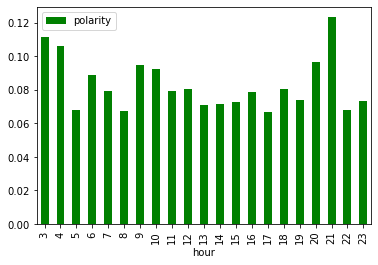

In [34]:
# Polarity by each hour

a = df.groupby('hour').agg({'polarity':'mean'})
a.plot(kind='bar', color='green')
plt.legend()